In [120]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to visualize more columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [121]:
# reading txn data
txn_data = pd.read_csv('interview_txn_data.csv')

In [122]:
# shape of data - 6 columns and 3412682 rows
txn_data.shape

(3412682, 6)

In [307]:
# Unique customer ID
txn_data['AgentRefID'].nunique()

4596

About the files - <br>
interview_txn_data.csv file has transaction data <br>
Amount - transaction value <br>
PayeeRefID - end customer ID <br>
CreatedDate - Transaction timestamp <br>
TransactionStatusRefID - 2 is for sucess and anything else is failed transaction <br>
AgentRefID - The retailer ID (Our Customer) <br>
DistributorRefID - Distributor acquires and gives credit to Agents <br>

In [123]:
# first 5 rows of the data
txn_data.head()

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID
0,2.0,12104,2018-10-14 13:52:31 UTC,2,1,1
1,2.0,12104,2018-08-11 16:55:33 UTC,2,1,1
2,2.0,24979501,2019-02-21 16:33:03 UTC,2,1,1
3,2.0,12104,2018-09-20 18:15:22 UTC,2,1,1
4,100.0,15957319,2018-07-22 07:14:24 UTC,2,1,1


In [124]:
# understandind datatypes of the data
txn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412682 entries, 0 to 3412681
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Amount                  float64
 1   PayeeRefID              int64  
 2   CreatedDate             object 
 3   TransactionStatusRefID  int64  
 4   AgentRefID              int64  
 5   DistributorRefID        int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 156.2+ MB


In [125]:
# converting date columns into datetime datatypes
txn_data['CreatedDate'] = pd.to_datetime(txn_data['CreatedDate'])

In [323]:
# max data present
max(txn_data['CreatedDate'])

Timestamp('2019-02-22 23:45:17+0000', tz='UTC')

In [128]:
# minimum date present
min(txn_data['CreatedDate'])

Timestamp('2018-07-01 18:39:28+0000', tz='UTC')

In [ ]:
# Data is present between July 2018 to Fev 2019

In [130]:
# Verying first Agent records
txn_data[txn_data['AgentRefID'] ==1]

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID
18,1.0,0,2018-07-17 10:22:35+00:00,2,1,1
7,100.0,15769656,2018-07-17 10:26:27+00:00,2,1,1
20,1.0,0,2018-07-22 07:11:17+00:00,2,1,1
4,100.0,15957319,2018-07-22 07:14:24+00:00,2,1,1
21,1.0,0,2018-07-27 14:36:31+00:00,2,1,1
26,1.0,0,2018-08-01 22:53:41+00:00,2,1,1
6,2.0,16357817,2018-08-01 22:55:37+00:00,10,1,1
1,2.0,12104,2018-08-11 16:55:33+00:00,2,1,1
17,1.0,0,2018-08-20 16:56:47+00:00,2,1,1
14,10.0,17169789,2018-08-20 16:58:20+00:00,2,1,1


In [131]:
# Creating new column for transaction month
txn_data['Txn_month'] = txn_data['CreatedDate'].dt.month

In [132]:
# # Creating new column for transaction year 
txn_data['Txn_Year'] = txn_data['CreatedDate'].dt.year

In [133]:
# To calculate duration between payment doing shift
txn_data['Next_payment_date'] = txn_data.groupby(['AgentRefID'])['CreatedDate'].shift(-1)

In [275]:
# created new variable for duration between previous and next payment
txn_data['duration']= (txn_data.Next_payment_date - txn_data.CreatedDate).dt.days

In [265]:
# get the attrition rate each month
def get_chrun_month(df,join_month, join_year):
    #print('HEre')
    
    customer_retention = []
    month_2019 =0
    day_0 = set(df[(df.Txn_month == join_month) & (df.Txn_Year== 2018 )]['AgentRefID'].unique())
    customer_retention.append(len(day_0))
    if join_month==12:
        join_year = 2019
        join_month = 0
    join_month +=1
    #print(join_month)
    while True:
        #print(join_year,join_month)
        if join_year == 2019 and join_month>2:
            break
        elif join_year == 2018 and join_month <=12:
            next_day = set(df[(df.Txn_month == join_month) & (df.Txn_Year== join_year )]['AgentRefID'].unique())
           # print(len(next_day))
            final_list = day_0 - next_day
            customer_retention.append(len(day_0)- len(final_list))
            
            if join_month==12:
                join_year = 2019
                join_month = 0
            join_month +=1
            
        elif join_year == 2019:
            #print(join_year,join_month, 2019)
            next_day = set(df[(df.Txn_month == join_month) & (df.Txn_Year== join_year )]['AgentRefID'].unique())
            final_list = day_0 - next_day
            customer_retention.append(len(day_0)- len(final_list))
            join_month +=1
        #print(join_year,join_month)  
    return customer_retention

In [267]:
attrition = pd.DataFrame(data =[], columns=['Date', '07-2018', '08-2018', '09-2018','10-2018','11-2018','12-2018','01-2019', '02-2019' ])
months_dict = {2018: [7,8,9,10, 11,12],2019: [1]}
for year in  months_dict.keys():
    for month in months_dict[year]:
        get_churn_data= get_chrun_month(txn_data,month, year)
       # print(get_churn_data)
        if get_churn_data[0] !=0:
            get_churn_percent = list(map(lambda x:str(round(x/get_churn_data[0],2)*100)+ "%", get_churn_data))
            #print(get_churn_percent)
        data = [str(year)+ "-" + str(month)]+['X']*(8-len(get_churn_percent)) + get_churn_percent
        a_series = pd.Series(data, index = attrition.columns)
        attrition = attrition.append(a_series, ignore_index=True)
attrition        

,Date,07-2018,08-2018,09-2018,10-2018,11-2018,12-2018,01-2019,02-2019
0,2018-7,100.0%,89.0%,89.0%,88.0%,81.0%,80.0%,75.0%,68.0%
1,2018-8,X,100.0%,91.0%,88.0%,81.0%,80.0%,75.0%,67.0%
2,2018-9,X,X,100.0%,89.0%,81.0%,79.0%,74.0%,66.0%
3,2018-10,X,X,X,100.0%,82.0%,81.0%,75.0%,67.0%
4,2018-11,X,X,X,X,100.0%,86.0%,80.0%,72.0%
5,2018-12,X,X,X,X,X,100.0%,84.0%,74.0%
6,2019-1,X,X,X,X,X,100.0%,84.0%,74.0%


In [ ]:
# Attrition rate is higher after 1st month 
# which avg 12% which highest amoung all the months like in 2nd month average 2-3%.

In [ ]:
# max days between payment cycle

In [269]:
txn_data.head()

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,Txn_month,Txn_Year,Next_payment_date,duration
733375,1.0,0,2018-07-01 18:39:28+00:00,2,153,164,7,2018,2018-07-01 18:40:44+00:00,0.0
1712391,1.0,0,2018-07-01 18:39:51+00:00,6,905,394,7,2018,2018-07-01 18:41:42+00:00,0.0
733448,1.0,0,2018-07-01 18:40:44+00:00,2,153,164,7,2018,2018-07-01 18:42:17+00:00,0.0
1712382,1.0,0,2018-07-01 18:41:42+00:00,6,905,394,7,2018,2018-07-03 08:15:14+00:00,1.0
734990,1500.0,15130418,2018-07-01 18:42:17+00:00,2,153,164,7,2018,2018-07-01 18:42:17+00:00,0.0


In [289]:
# checking what is max duration in which people use the app for the payment
grouped_data = txn_data.groupby(['AgentRefID'])['duration'].max().reset_index()

In [296]:
grouped_data.head()

,AgentRefID,duration
0,1,60.0
1,2,1.0
2,3,11.0
3,4,6.0
4,5,3.0


In [302]:
# bining the duration in months
def get_duration_binning (x):
    if x<=30:
        return "LE30"
    elif x>30 and x<60:
        return "GT30LE60"
    else:
        return "GT60"
grouped_data['duration_month'] = grouped_data.apply(lambda x:get_duration_binning(x['duration']), axis=1)

In [306]:
# calcuated % of people in their max duration of payment usage
100*grouped_data['duration_month'].value_counts()/len(grouped_data)

LE30        61.270670
GT30LE60    21.496954
GT60        17.232376
Name: duration_month, dtype: float64

In [ ]:
# from above grouped data, It is shown that 61.2% of people are using paynearby for payment within a month
# and 21% of the people do their payment in less than 2 months


/home/santosh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


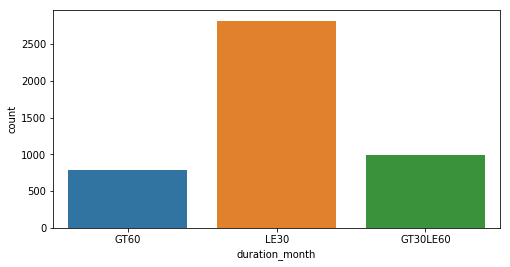

In [311]:
# ploting the countplot
plt.figure(figsize=(8,4))
sns.countplot(grouped_data['duration_month'])
plt.show()

## Result:
1.From the above analysis it is shown that attrition rate is higher after 1st month which is 12% average attrition rate.
2. More than 60% of people using the app by max 30 days of the interval. 

So, We can use 1 month as our attrition period.
